# Breast Cancer Prediction using Neural Networks

Predicting **Breast Cancer** at an early stage can save countless lives. By analyzing medical diagnostic data, machine learning models—especially neural networks—can help distinguish between **benign** (non-cancerous) and **malignant** (cancerous) tumors with high accuracy.

Breast cancer is one of the most common cancers worldwide, affecting millions of women every year. Despite advances in treatment, early detection remains the most effective way to improve survival rates. With modern computational techniques, we can leverage clinical features extracted from patient data to build predictive systems that assist doctors in decision-making.

Healthcare providers are increasingly relying on AI-powered tools to support early detection, reduce diagnostic errors, and prioritize patients who may require immediate medical attention. Accurate predictions not only help doctors but also reduce costs by minimizing unnecessary procedures.

## What is Breast Cancer and why do we need to address it?

Breast cancer occurs when abnormal cells in the breast grow uncontrollably, often forming a lump or tumor. These tumors can either be benign (non-life-threatening) or malignant (cancerous and capable of spreading). Detecting malignancy early is critical, as treatment is most effective in the initial stages of the disease.

If left undetected, breast cancer can spread to other parts of the body, making treatment much more complex and reducing survival chances. This is why early screening and prediction are essential tools in modern healthcare.

## Why use Machine Learning for Breast Cancer Prediction?

Traditional diagnostic methods rely heavily on medical imaging, biopsies, and manual examination by specialists. While these methods are effective, they are also time-consuming, costly, and prone to human error.

Machine learning, and specifically neural networks, provide an alternative by learning complex patterns in patient data (such as tumor size, cell texture, smoothness, and other measured attributes). A well-trained model can:

- Predict whether a tumor is benign or malignant

- Assist doctors in making quicker, data-driven decisions

- Improve accuracy and reduce false negatives (missed cancer cases)

- Reduce unnecessary biopsies and diagnostic costs

## Why is this important?

The stakes are high in medical diagnosis—every missed case of breast cancer could mean a delayed treatment and lower chances of survival. At the same time, unnecessary false alarms increase patient stress and lead to costly medical tests.

By building robust predictive systems, we can strike the right balance between sensitivity (catching all real cancer cases) and specificity (avoiding false alarms). This ensures better outcomes for patients and helps healthcare systems operate more efficiently.

## Problem Statement

**Task:** Binary classification — predict whether a tumor is malignant (1) or benign (0) from numeric features computed from digitized images of fine needle aspirate (FNA) of a breast mass.

**Why NN?** Logistic Regression and tree ensembles are strong baselines on tabular data. A carefully regularized NN can match them while offering flexible non-linear modeling and compatibility with gradient-based explainability (e.g., Integrated Gradients).

### Importing required libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading the dataset

data = pd.read_csv('/Users/bengj/Data Science/Breast Cancer Prediction/dataset/breast-cancer.csv')
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### Exploratory Data Analysis

In [3]:
data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [4]:
# Information about the features in the dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

**We don't require the id column, thereby dropping it.**

In [5]:
data.drop(columns = ['id'], axis = 1, inplace = True)
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [6]:
# Number of rows and columns in the dataset

print("Shape of the dataset:", data.shape)

Shape of the dataset: (569, 31)


In [7]:
# Checking for Null values

data.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

**There are no NULL values in our dataset.**

In [8]:
# Descriptive Statistics

data.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


**Diagnosis is our target variable, we will do the independent-dependent feature split.**

In [9]:
# Splitting independent and dependent variables

X = data.drop(columns = ['diagnosis'],axis = 1)
Y = data['diagnosis']

In [10]:
print(Y)

0      M
1      M
2      M
3      M
4      M
      ..
564    M
565    M
566    M
567    M
568    B
Name: diagnosis, Length: 569, dtype: object


In [11]:
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


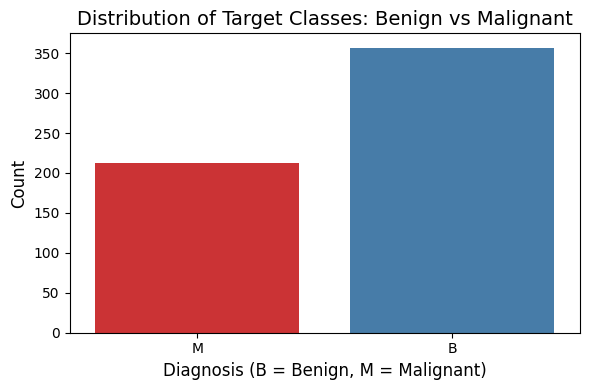

In [12]:
# Displaying the features in target column

benign_count, malignant_count = Y.value_counts()

plt.figure(figsize = (6,4))
ax = sns.countplot(x = Y, palette = "Set1")
plt.title("Distribution of Target Classes: Benign vs Malignant", fontsize = 14)
plt.xlabel("Diagnosis (B = Benign, M = Malignant)", fontsize = 12)
plt.ylabel("Count", fontsize = 12)

plt.tight_layout()
plt.show()

**Let's dive deep into the descriptive statistics of other columns with respect to target column**

In [13]:
data_copy = data.copy()

In [14]:
# Encoding the target column

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

In [15]:
labels = label_encoder.fit_transform(data_copy['diagnosis'])

data_copy['target'] = labels

data_copy.drop(columns = 'diagnosis', axis = 1, inplace = True)

data_copy['target'].value_counts()

target
0    357
1    212
Name: count, dtype: int64

In [16]:
# Grouping the data based on the target

data_copy.groupby('target').mean()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
target,,,,,,,,,,,,,,,,,,,,,
0,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442
1,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530


**We can clearly see that for most of the features, the mean values are higher for Malignant(1) cases and lower for Benign(0) cases**

### Data Visualization

<Axes: ylabel='Density'>

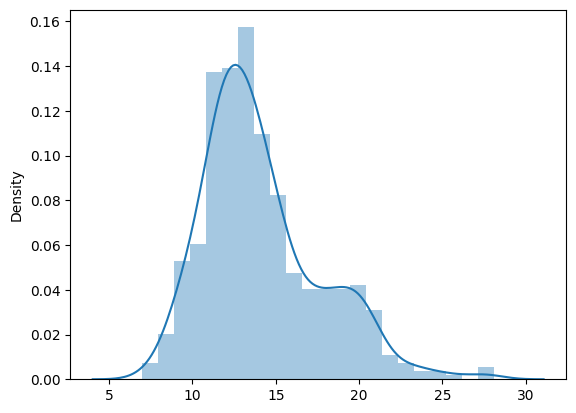

In [17]:
sns.distplot(x = data.radius_mean)

**Most of the features are rightly skewed in this dataset.**

**Violion Plots**

- We will be using seaborn and matplotlib for data visualization.

- We will use violion plots for visualizing the distribution of features with respect to the target variable. Violin plots are a combination of box plot and kernel density plot, which gives a better understanding of the distribution of the data. 

- Violion plots particularly useful for comparing the distribution of a feature across different categories of the target variable.

- Before visualizing the data, we need to standardize or normalize the features. Otherwise, features with larger ranges will dominate the visualizations.

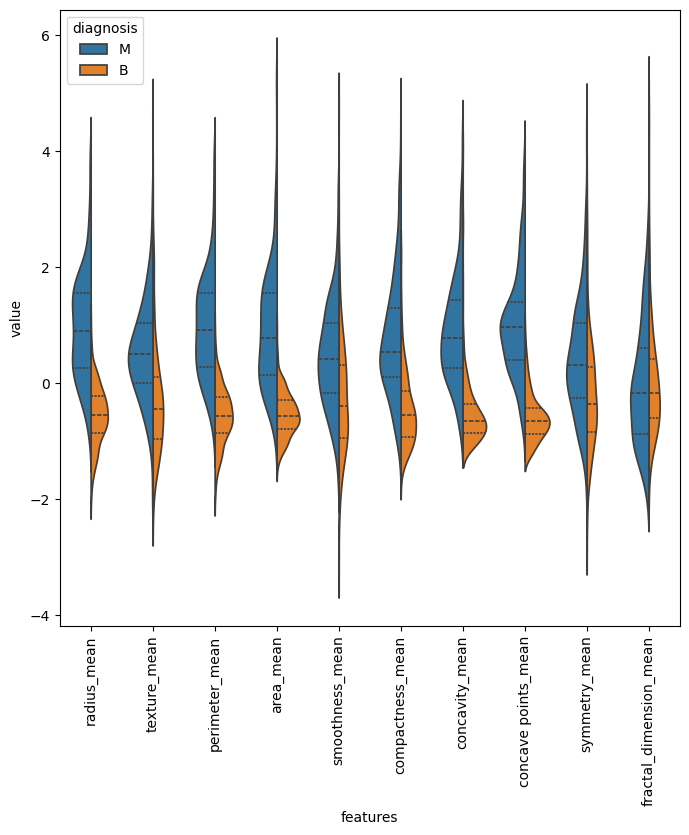

In [18]:
# First ten features of the dataset

data_dia = Y # diagnosis column
data = X

# Standardizing the data: z = (x - mean) / std
data_std = (data - data.mean()) / (data.std())  

# Keep only first 10 standardized features and add diagnosis          
data = pd.concat([Y, data_std.iloc[:, 0:10]], axis = 1)

# Reshape dataframe for seaborn, converts wide → long format
data = pd.melt(data, id_vars = "diagnosis", var_name = "features", value_name = 'value')

plt.figure(figsize = (8,8))
sns.violinplot(x = "features", y = "value", hue = "diagnosis", data = data ,split = True, inner = "quart")
plt.xticks(rotation = 90)
plt.show()

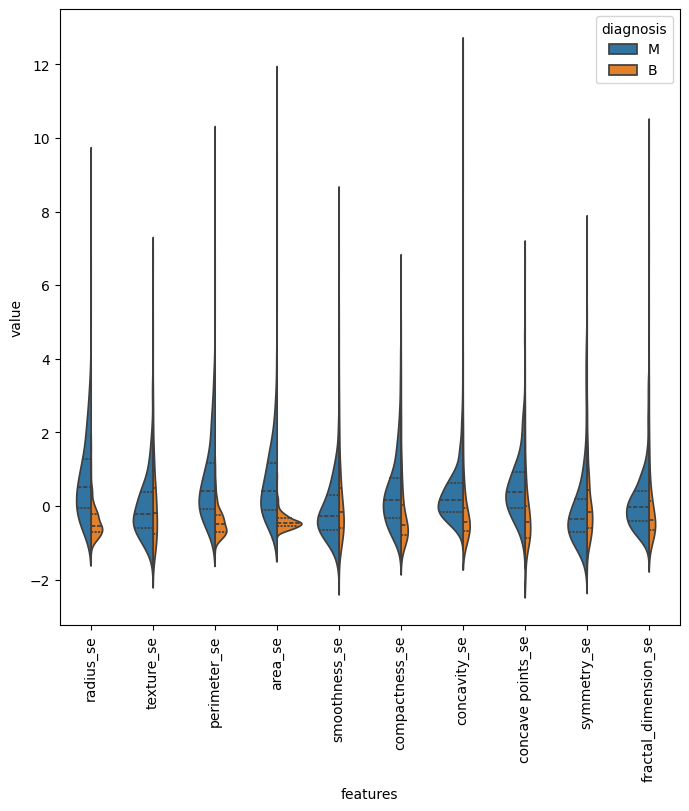

In [19]:
# Second ten features of the dataset

data = pd.concat([Y, data_std.iloc[:, 10:20]], axis = 1)

data = pd.melt(data,id_vars = "diagnosis", var_name = "features", value_name = 'value')

plt.figure(figsize=(8, 8))
sns.violinplot(x = "features", y = "value", hue = "diagnosis", data = data, split = True, inner = "quart")
plt.xticks(rotation = 90)
plt.show()

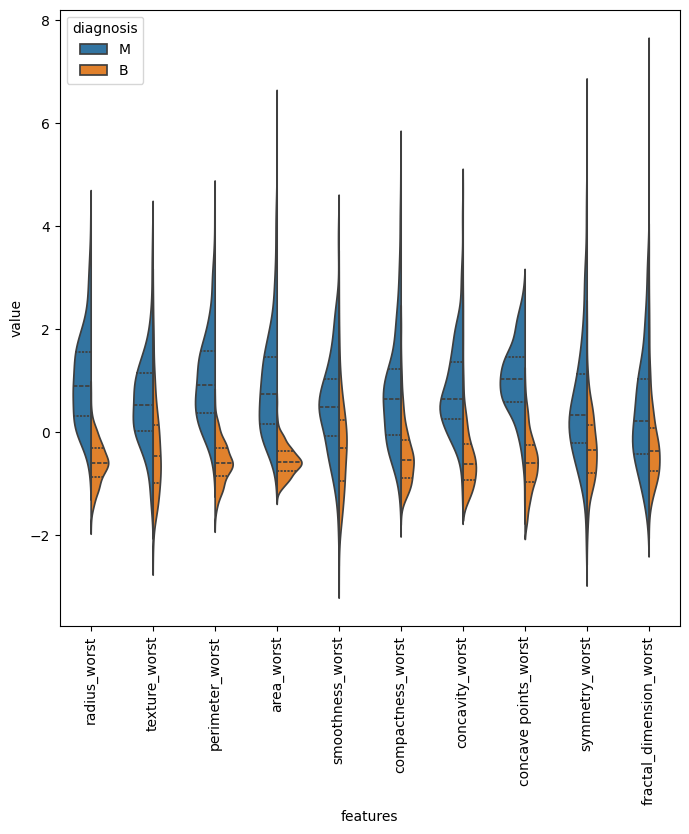

In [20]:
# Last ten features of the dataset

data = pd.concat([Y, data_std.iloc[:, 20:30]], axis = 1)

data = pd.melt(data,id_vars = "diagnosis", var_name = "features", value_name = 'value')

plt.figure(figsize = (8, 8))
sns.violinplot(x = "features", y = "value", hue = "diagnosis", data = data, split = True, inner = "quart")
plt.xticks(rotation = 90)
plt.show()

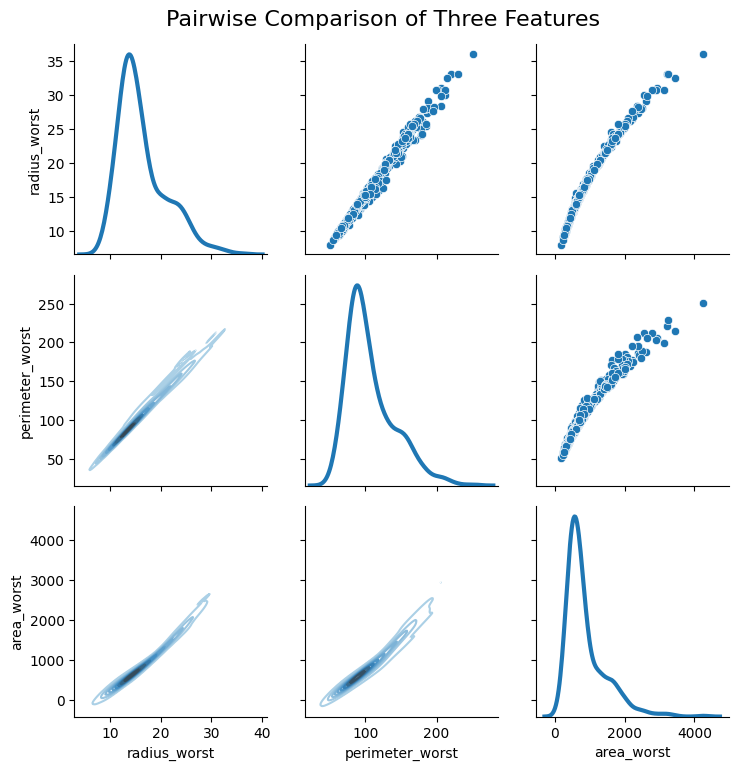

In [21]:
# Three feature comparison using pairwise comparison plot

data = X.loc[:, ['radius_worst','perimeter_worst','area_worst']]

grid = sns.PairGrid(data, diag_sharey = False) # diag_sharey = False means y-axis on diagonals won’t be shared

# On the lower triangle of the grid, plot 2D kernel density estimates
grid.map_lower(sns.kdeplot, cmap = "Blues_d")

# On the upper triangle of the grid, plot scatter plots.
grid.map_upper(sns.scatterplot, cmap = "Blues_d")

# On the diagonal (feature vs itself), plot a 1D KDE curve
grid.map_diag(sns.kdeplot, lw = 3)

grid.fig.suptitle("Pairwise Comparison of Three Features", fontsize=16, y=1.02)
plt.show()

**We discover that radius_worst, perimeter_worst and area_worst are correlated as it can be seen pair grid plot. We will definetely use these features for feature selection**

**Swarm Plots**

We will utilize swarm plots now just like our violin plots to visualize the distribution of features with respect to the target variable. `Swarm plots` are a type of scatter plot that displays individual data points while avoiding overlap, making it easier to see the distribution and density of the data.

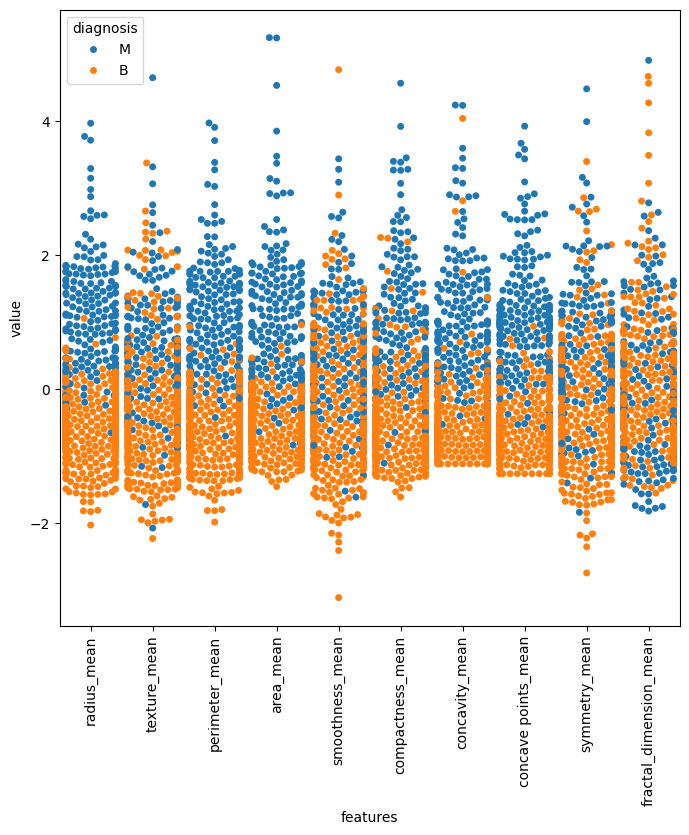

In [22]:
# First ten features of the dataset 

data_dia = Y  # diagnosis column
data = X

# Standardizing the data: z = (x - mean) / std
data_std = (data - data.mean()) / (data.std())

# Keep only first 10 standardized features and add diagnosis
data = pd.concat([Y, data_std.iloc[:, 0:10]], axis = 1)

# Reshape dataframe for seaborn (wide → long format)
data = pd.melt(data, id_vars = "diagnosis", var_name = "features", value_name = "value")

plt.figure(figsize = (8, 8))

# Swarmplot: shows distribution of values for each feature grouped by diagnosis
sns.swarmplot(x = "features", y = "value", hue = "diagnosis", data = data)

plt.xticks(rotation = 90)
plt.show()

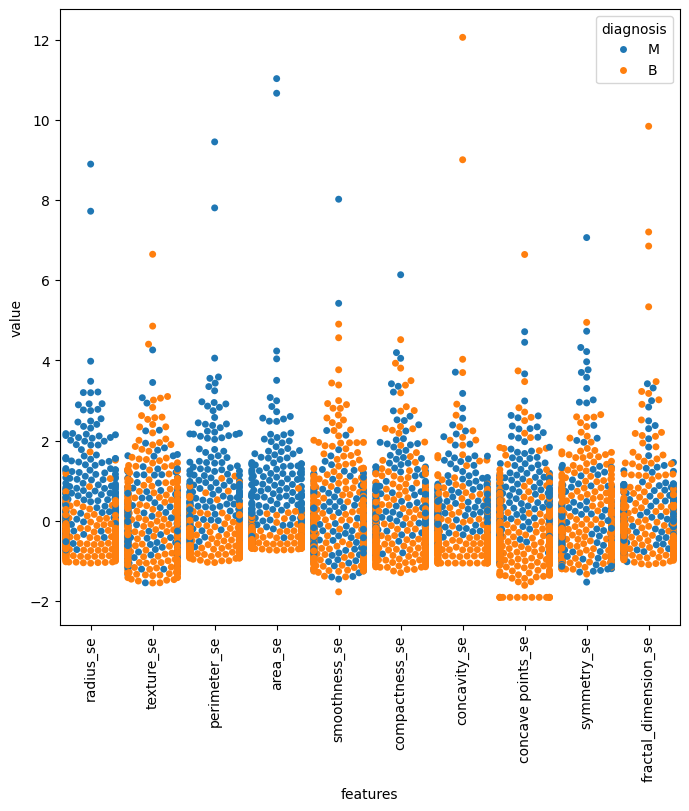

In [23]:
# Second ten features of the dataset 

data = pd.concat([Y, data_std.iloc[:, 10:20]], axis = 1)

# Reshape dataframe for seaborn (wide → long format)
data = pd.melt(data, id_vars = "diagnosis", var_name = "features", value_name = "value")

plt.figure(figsize = (8, 8))

# Swarmplot: shows distribution of values for each feature grouped by diagnosis
sns.swarmplot(x = "features", y = "value", hue = "diagnosis", data = data)

plt.xticks(rotation = 90)
plt.show()

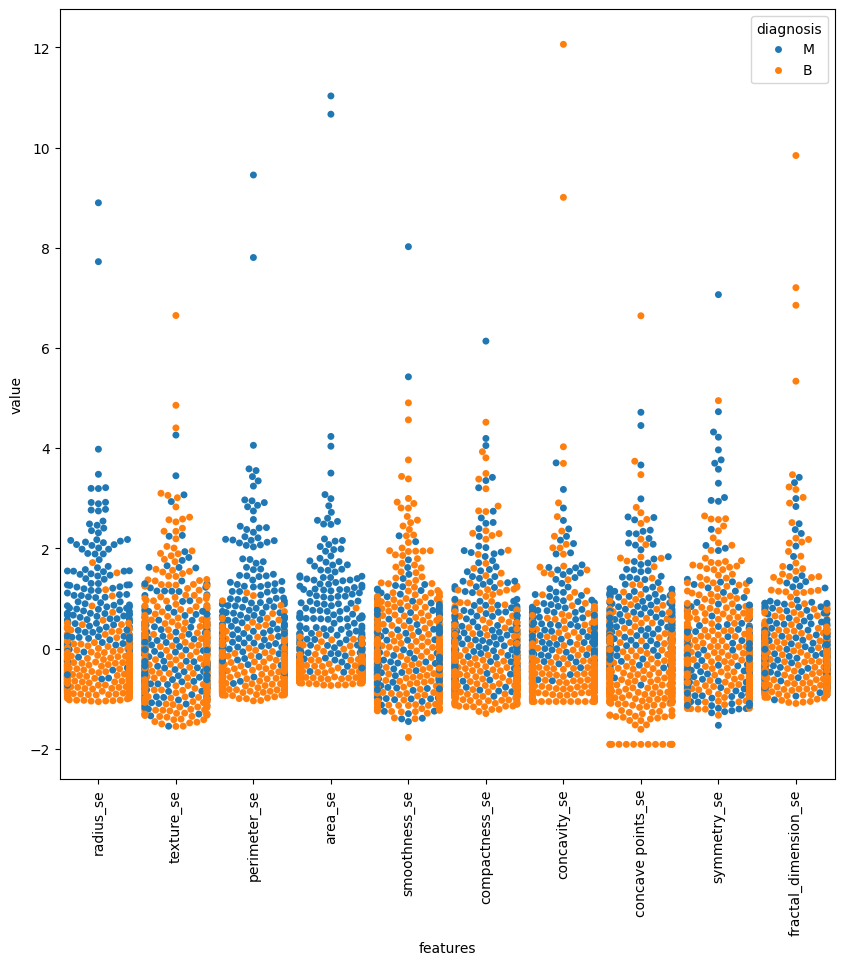

In [24]:
# Second ten features of the dataset 

data = pd.concat([Y, data_std.iloc[:, 10:20]], axis = 1)

# Reshape dataframe for seaborn (wide → long format)
data = pd.melt(data, id_vars = "diagnosis", var_name = "features", value_name = "value")

plt.figure(figsize = (10, 10))

# Swarmplot: shows distribution of values for each feature grouped by diagnosis
sns.swarmplot(x = "features", y = "value", hue = "diagnosis", data = data)

plt.xticks(rotation = 90)
plt.show()

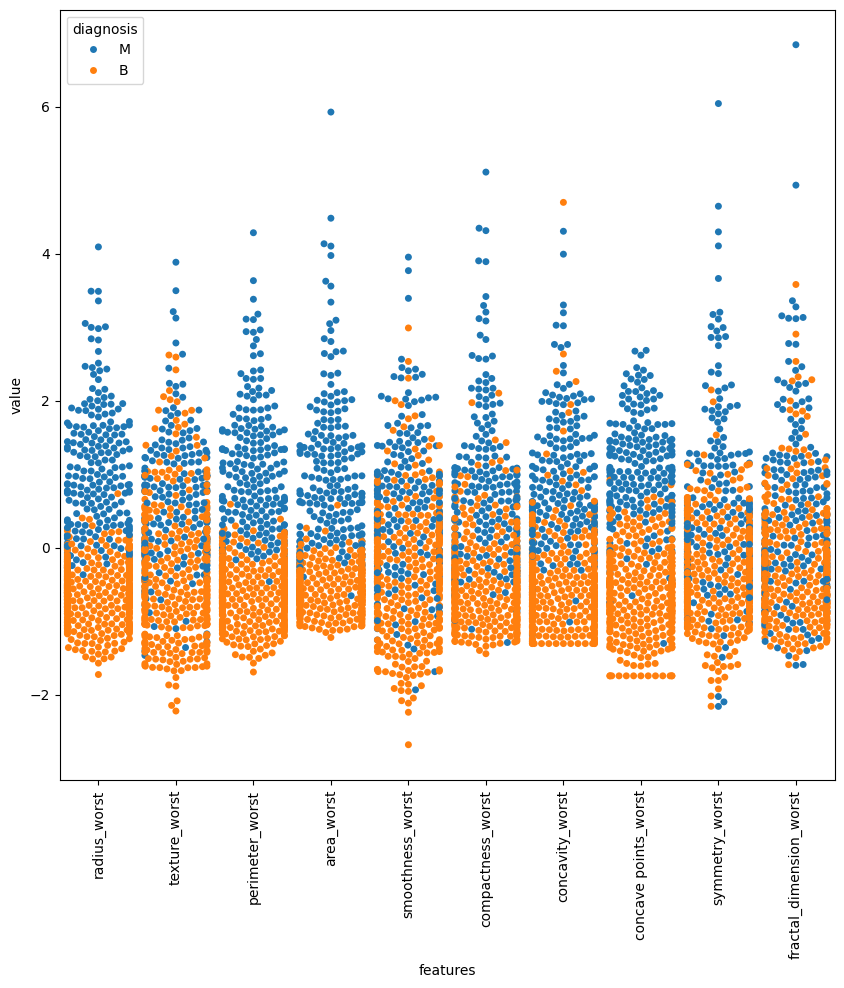

In [25]:
# Last ten features of the dataset 

data = pd.concat([Y, data_std.iloc[:, 20:30]], axis = 1)

# Reshape dataframe for seaborn (wide → long format)
data = pd.melt(data, id_vars = "diagnosis", var_name = "features", value_name = "value")

plt.figure(figsize = (10, 10))

# Swarmplot: shows distribution of values for each feature grouped by diagnosis
sns.swarmplot(x = "features", y = "value", hue = "diagnosis", data = data)

plt.xticks(rotation = 90)
plt.show()

**Correlation Matrix**

Now the GOAT of all visualizations, the `Correlation Matrix`. A correlation matrix is a table that shows the correlation coefficients between many variables. Each cell in the table shows the correlation between two variables. The value is between -1 and 1. 

- If two variables have a high positive correlation, it means that when one variable increases, the other variable tends to also increase. 

- If they have a high negative correlation, it means that when one variable increases, the other variable tends to decrease.

<Axes: >

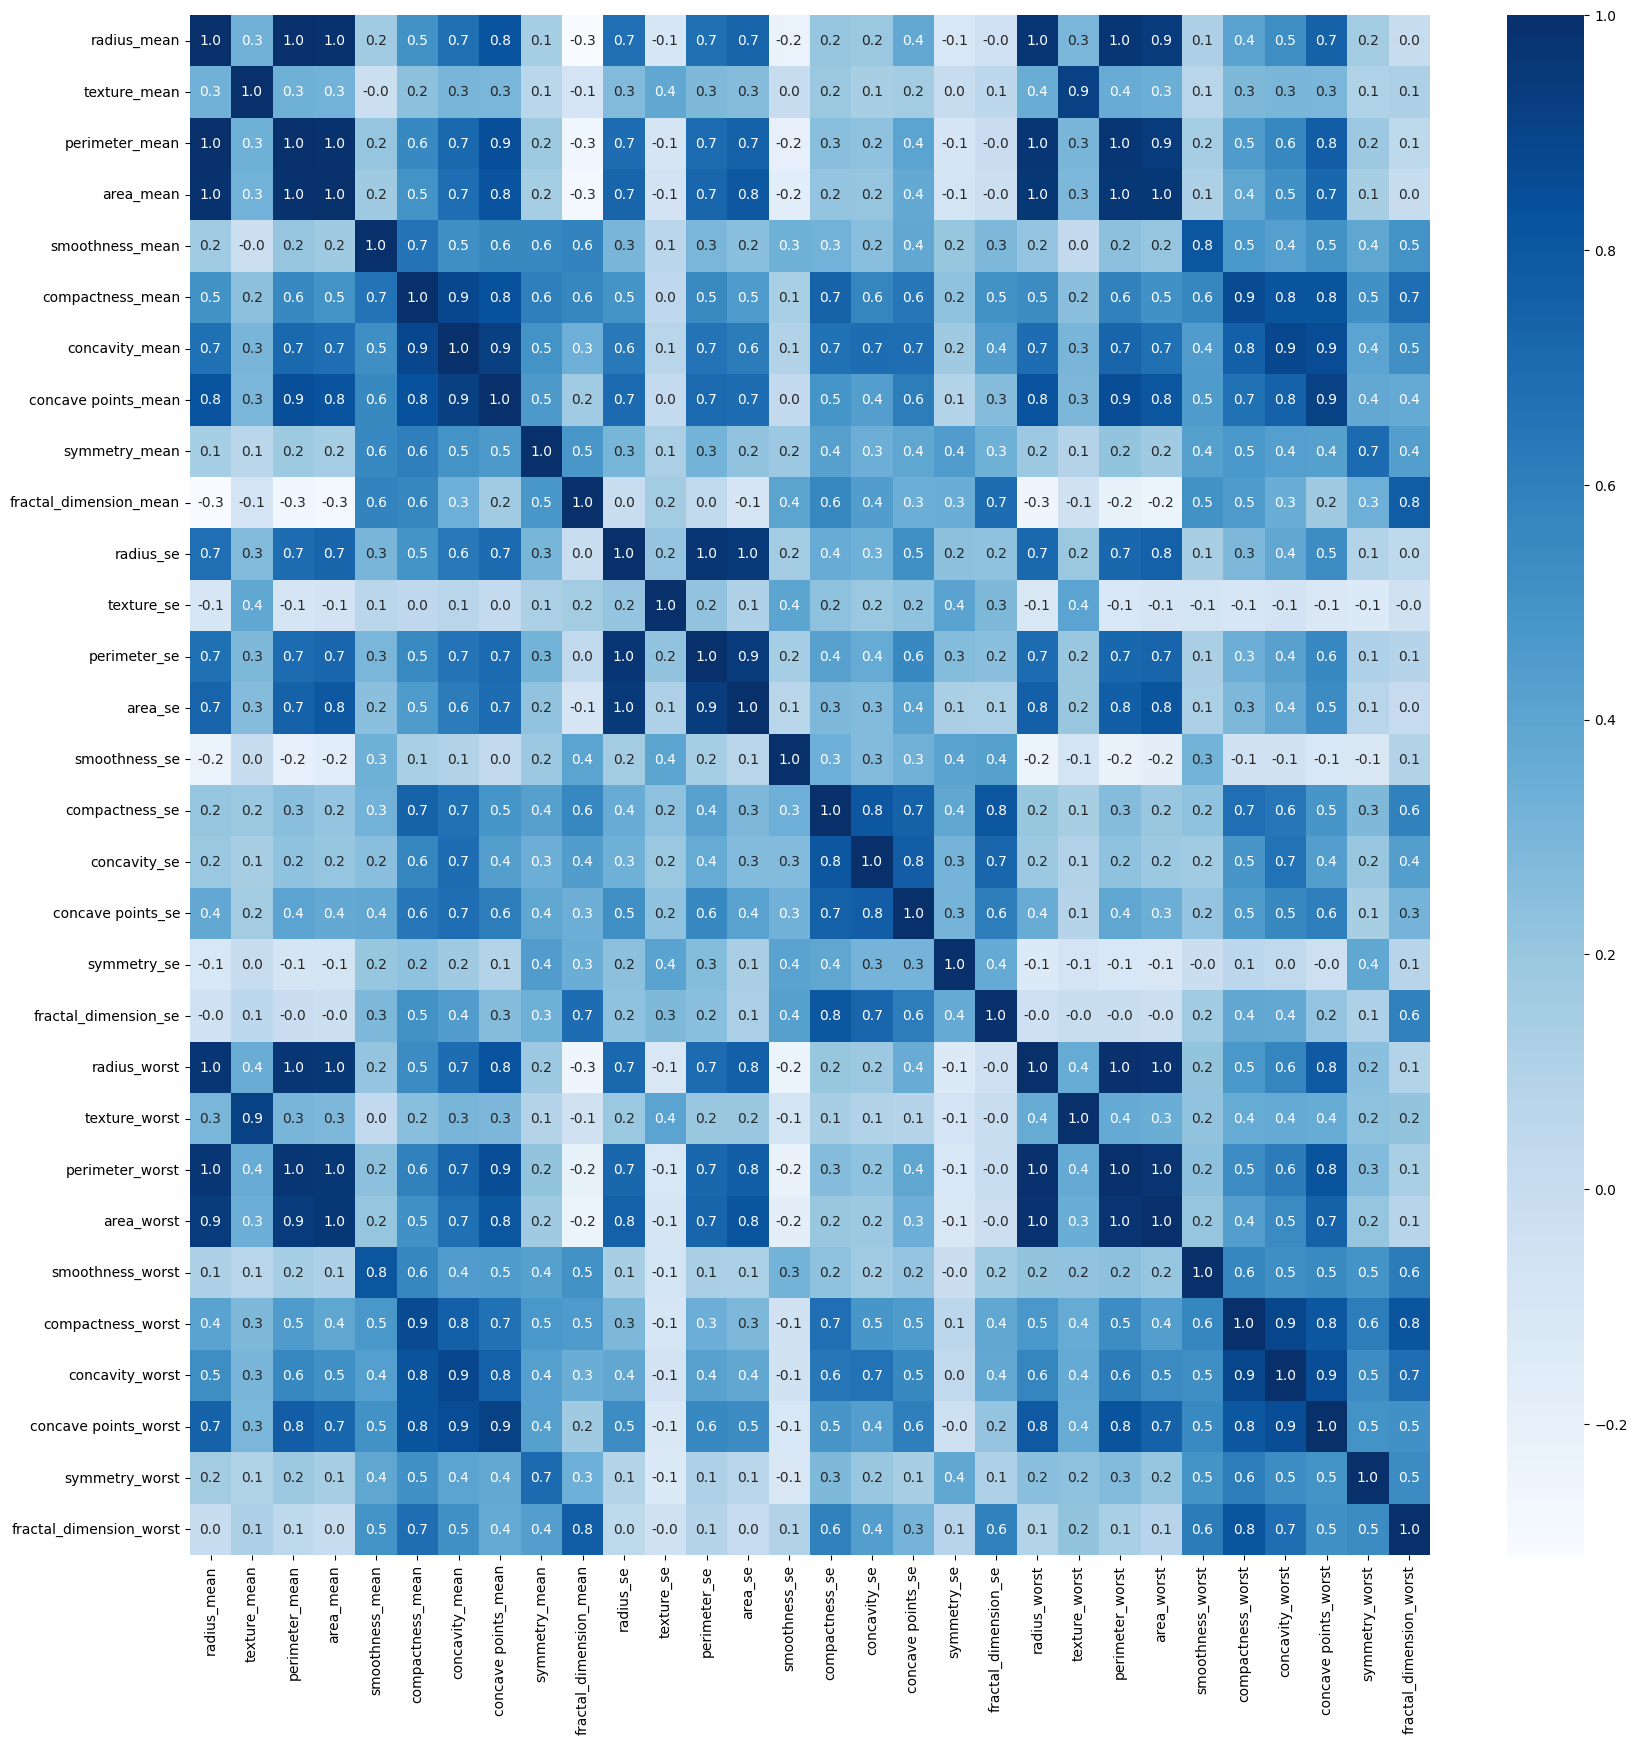

In [26]:
plt.figure(figsize = (20,20))
sns.heatmap(X.corr(), annot = True, fmt = '.1f', cbar = True, cmap = 'Blues')

In [27]:
Y = labels

In [28]:
print(Y.shape)

(569,)


### Train-Test Split

In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)
print(X.shape, X_train.shape, X_test.shape)

(569, 30) (455, 30) (114, 30)


### Data Standardization

In [30]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()

In [31]:
X_train_std = std_scaler.fit_transform(X_train)

X_test_std = std_scaler.transform(X_test)

### Building Artificial Neural Network

In [32]:
# Importing required libraries

import tensorflow as tf
from tensorflow import keras

tf.random.set_seed(3)

In [33]:
# Setting the layers of the ANN

model = keras.Sequential([
    # Flatten ensures the input is a 1D vector of length 30
    keras.layers.Flatten(input_shape = (30, )),
    
    # Hidden layer with 20 neurons
    # Each neuron computes a weighted sum of inputs + bias, then applies the ReLU activation
    keras.layers.Dense(20, activation = "relu"),

    # Output layer with 2 neurons with sigmoid activation
    keras.layers.Dense(2, activation = "sigmoid")
])

In [34]:
# Compiling the model

model.compile(
    # optimizer decides how weights get updated during training
    optimizer = 'adam', 

    # loss function measures how wrong your predictions are compared to the true labels
    loss = 'sparse_categorical_crossentropy',

    # performance measures, accuracy → percentage of correctly classified samples
    metrics = ['accuracy']
)

In [35]:
# Training the model

history = model.fit(X_train_std, Y_train, validation_split = 0.1, epochs = 10, batch_size = 16)

Epoch 1/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7604 - loss: 0.5933 - val_accuracy: 0.8261 - val_loss: 0.3872
Epoch 2/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8729 - loss: 0.3408 - val_accuracy: 0.8478 - val_loss: 0.2670
Epoch 3/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9144 - loss: 0.2375 - val_accuracy: 0.8696 - val_loss: 0.2149
Epoch 4/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9315 - loss: 0.1876 - val_accuracy: 0.8913 - val_loss: 0.1848
Epoch 5/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9438 - loss: 0.1575 - val_accuracy: 0.8913 - val_loss: 0.1649
Epoch 6/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9609 - loss: 0.1371 - val_accuracy: 0.9348 - val_loss: 0.1506
Epoch 7/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9633 - loss: 0.1225 - val_accuracy: 0.9565 - val_loss: 0.1399
Epoch 8/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9707 - loss: 0.1117 - val_accuracy: 0.9783 - val_loss:

### Model Evaluation

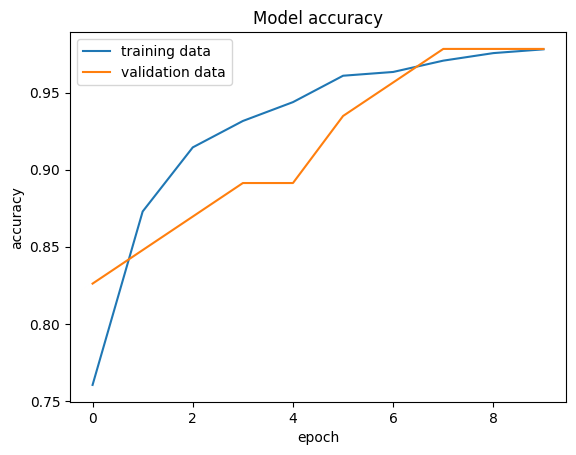

In [36]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.legend(['training data', 'validation data'])

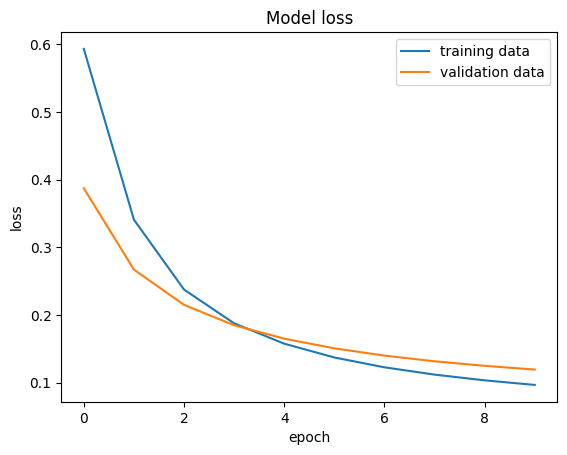

In [37]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')

plt.legend(['training data', 'validation data'])

In [38]:
# Accuracy of the model on testing data

loss, accuracy = model.evaluate(X_test_std, Y_test)
print(f"Accuracy of the model: {accuracy}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9737 - loss: 0.0969
Accuracy of the model: 0.9736841917037964


In [39]:
print(X_test_std.shape)
print(X_test_std[0])

(114, 30)
[-0.46649743 -0.13728933 -0.44421138 -0.48646498  0.28085007  0.04160589
 -0.11146496 -0.26486866  0.41524141  0.13513744 -0.02091509 -0.29323907
 -0.17460869 -0.2072995  -0.01181432 -0.35108921 -0.1810535  -0.24238831
 -0.33731758 -0.0842133  -0.2632354  -0.14784208 -0.33154752 -0.35109337
  0.48001942 -0.09649594 -0.03583041 -0.19435087  0.17275669  0.20372995]


In [40]:
# Model prediction

Y_pred = model.predict(X_test_std)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


In [41]:
print(Y_pred.shape)
print(Y_pred[0])

(114, 2)
[0.63081366 0.1831379 ]


**The predictions are in form of probabilities, the first part shows how much percentage the tumor is malignant and the second part shows how much percentage the tumor is benign.**

In [42]:
# Converting the prediction probability to class labels

Y_pred_labels = [np.argmax(i) for i in Y_pred]
print(Y_pred_labels)

[0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1]


### Predictive System

In [43]:
# Input data containing random features from the dataset
input_data = (11.76,21.6,74.72,427.9,0.08637,0.04966,0.01657,0.01115,0.1495,0.05888,0.4062,1.21,2.635,28.47,0.005857,0.009758,0.01168,0.007445,0.02406,0.001769,12.98,25.72,82.98,516.5,0.1085,0.08615,0.05523,0.03715,0.2433,0.06563)

# Converting to numpy array
input_data_np_array = np.asarray(input_data)

# Reshaping the numpy array as we're predicting for one data point
input_data_reshaped = input_data_np_array.reshape(1, -1)

# Standarding the input data
input_data_std = std_scaler.transform(input_data_reshaped)

In [44]:
prediction = model.predict(input_data_std)
print(prediction)

prediction_label = [np.argmax(prediction)]

if(prediction_label[0] == 0):
  print('The tumor is Malignant!')
else:
  print('The tumor is Benign!')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
[[0.80496633 0.05219581]]
The tumor is Malignant!
